# Task 1: Data Preparation


## Importing modules

In [75]:
#importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

In [76]:
# to avoid warnings
import warnings   
warnings.filterwarnings("ignore")

In [77]:
# to display all the rows and columns to have clear data
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None) 

## Understanding Data

### Importing the required datasets

In [78]:
#importing the csv files
primary_data = pd.read_csv('Primary.csv',header = 1)
secondary_data = pd.read_csv('Secondary.csv',header = 1)
total_data = pd.read_csv('Total School Age.csv',header =1)

#### Understanding the first data set

In [79]:
# Exploring Primary.csv
#Checking the rows and columns of the data set
primary_data.shape

(87, 12)

In [80]:
#Displaying 10 random rows from the data set
primary_data.sample(10, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
10,BFA,Burkina Faso,SSA,WCA,Low income (L),1%,1%,3%,1%,4%,Demographic and Health Survey,2010
40,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),1%,1%,4%,0%,5%,Multiple Indicator Cluster Survey,2017
41,LSO,Lesotho,SSA,ESA,Lower middle income (LM),30%,21%,50%,5%,68%,Multiple Indicator Cluster Survey,2018
65,ZAF,South Africa,SSA,ESA,Upper middle income (UM),18%,NaN,NaN,NaN,NaN,South Africa Living Conditions Survey 2014-15,2014-15
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),30%,NaN,22%,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013
54,NGA,Nigeria,SSA,WCA,Lower middle income (LM),3%,NaN,NaN,NaN,NaN,"General Household Survey, Panel 2018-2019, Wave 4",2018-2019
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81%,69%,89%,46%,99%,Demographic and Health Survey,2015-16
60,STP,Sao Tome and Principe,SSA,WCA,Lower middle income (LM),44%,37%,47%,18%,75%,Multiple Indicator Cluster Survey,2019
15,CHN,China,EAP,EAP,Upper middle income (UM),62%,53%,91%,NaN,NaN,CHARLS 2018,2018
74,TON,Tonga,EAP,EAP,Upper middle income (UM),90%,89%,94%,82%,94%,Multiple Indicator Cluster Survey,2019


In [81]:
#getting to know the datatypes of the attributes in the dataset
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ISO3                       87 non-null     object
 1   Countries and areas        87 non-null     object
 2   Region                     87 non-null     object
 3   Sub-region                 87 non-null     object
 4   Income Group               87 non-null     object
 5   Total                      87 non-null     object
 6   Rural (Residence)          76 non-null     object
 7   Urban (Residence)          79 non-null     object
 8   Poorest (Wealth quintile)  69 non-null     object
 9   Richest (Wealth quintile)  66 non-null     object
 10  Data source                87 non-null     object
 11  Time period                87 non-null     object
dtypes: object(12)
memory usage: 8.3+ KB


Inference : 
* The data set has 12 columns and 87 rows
* All the columns are of object type
* We have missing values in 4 columns of the data set

In [82]:
# Converting Total, Rural, Poorest, Richest into numeric for ease of data manipulation
def convert_datatype(x):
    return x.str.rstrip('%').astype('float')/100.0

primary_data['Total'] = convert_datatype(primary_data['Total'])
primary_data['Rural (Residence)'] = convert_datatype(primary_data['Rural (Residence)'])
primary_data['Urban (Residence)'] = convert_datatype(primary_data['Urban (Residence)'])
primary_data['Poorest (Wealth quintile)'] = convert_datatype(primary_data['Poorest (Wealth quintile)'])
primary_data['Richest (Wealth quintile)'] = convert_datatype(primary_data['Richest (Wealth quintile)'])

In [83]:
#Checking the unique values in the dataset
primary_data.nunique()

ISO3                         87
Countries and areas          87
Region                        6
Sub-region                    8
Income Group                  4
Total                        55
Rural (Residence)            41
Urban (Residence)            54
Poorest (Wealth quintile)    33
Richest (Wealth quintile)    44
Data source                  27
Time period                  21
dtype: int64

In [84]:
#checking our data frame after these modifications made
primary_data.sample(5, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
10,BFA,Burkina Faso,SSA,WCA,Low income (L),0.01,0.01,0.03,0.01,0.04,Demographic and Health Survey,2010
40,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),0.01,0.01,0.04,0.00,0.05,Multiple Indicator Cluster Survey,2017
41,LSO,Lesotho,SSA,ESA,Lower middle income (LM),0.30,0.21,0.50,0.05,0.68,Multiple Indicator Cluster Survey,2018
65,ZAF,South Africa,SSA,ESA,Upper middle income (UM),0.18,NaN,NaN,NaN,NaN,South Africa Living Conditions Survey 2014-15,2014-15
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.30,NaN,0.22,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013


In [85]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       87 non-null     object 
 1   Countries and areas        87 non-null     object 
 2   Region                     87 non-null     object 
 3   Sub-region                 87 non-null     object 
 4   Income Group               87 non-null     object 
 5   Total                      87 non-null     float64
 6   Rural (Residence)          76 non-null     float64
 7   Urban (Residence)          79 non-null     float64
 8   Poorest (Wealth quintile)  69 non-null     float64
 9   Richest (Wealth quintile)  66 non-null     float64
 10  Data source                87 non-null     object 
 11  Time period                87 non-null     object 
dtypes: float64(5), object(7)
memory usage: 8.3+ KB


#### Checking for missing values

In [86]:
#checking how many null values are present in each of the columns
#creating a function to find null values for the dataframe
def null_values(df):
    return round((df.isna().sum()*100/len(df)).sort_values(ascending = False),2)

In [87]:
null_values(primary_data)

Richest (Wealth quintile)    24.14
Poorest (Wealth quintile)    20.69
Rural (Residence)            12.64
Urban (Residence)             9.20
ISO3                          0.00
Countries and areas           0.00
Region                        0.00
Sub-region                    0.00
Income Group                  0.00
Total                         0.00
Data source                   0.00
Time period                   0.00
dtype: float64

We have decided to impute the missing values with mean of the column.<br> We find out the mean by first grouping columns on the basis of region, sub region and income group.
Then we substitute this mean to the null values in each of the columns

In [88]:
grouped_income_region_subregion = primary_data.groupby(['Region','Sub-region','Income Group']).mean()
grouped_income_region_subregion

Total  Rural (Residence)  \
Region Sub-region Income Group                                            
EAP    EAP        High income (H)           0.750000           0.810000   
                  Lower middle income (LM)  0.326000           0.137500   
                  Upper middle income (UM)  0.733333           0.690000   
ECA    EECA       Low income (L)            0.230000           0.190000   
                  Lower middle income (LM)  0.546667           0.425000   
                  Upper middle income (UM)  0.720000           0.631000   
       WE         High income (H)           0.810000                NaN   
LAC    LAC        High income (H)           0.562000           0.432000   
                  Low income (L)            0.180000           0.100000   
                  Lower middle income (LM)  0.075000           0.040000   
                  Upper middle income (UM)  0.380000           0.214545   
MENA   MENA       Lower middle income (LM)  0.226667           0.133333   
                  Upper middle income (UM)  0.410000           0.330000   
SA     SA         Low income (L)            0.460000           0.310000   
                  Lower middle income (LM)  0.163333           0.126667   
                  Upper middle income (UM)  0.685000           0.660000   
SSA    ESA        Low income (L)            0.052500           0.016667   
                  Lower middle income (LM)  0.161429           0.071667   
                  Upper middle income (UM)  0.120000           0.010000   
       WCA        Low income (L)            0.104545           0.063000   
                  Lower middle income (LM)  0.110000           0.083333   

                                            Urban (Residence)  \
Region Sub-region Income Group                                  
EAP    EAP        High income (H)                    0.740000   
                  Lower middle income (LM)           0.404000   
                  Upper middle income (UM)           0.866667   
ECA    EECA       Low income (L)                     0.370000   
                  Lower middle income (LM)           0.600000   
                  Upper middle income (UM)           0.785000   
       WE         High income (H)                         NaN   
LAC    LAC        High income (H)                    0.622000   
                  Low income (L)                     0.330000   
                  Lower middle income (LM)           0.150000   
                  Upper middle income (UM)           0.446364   
MENA   MENA       Lower middle income (LM)           0.303333   
                  Upper middle income (UM)           0.445000   
SA     SA         Low income (L)                     0.540000   
                  Lower middle income (LM)           0.270000   
                  Upper middle income (UM)           0.795000   
SSA    ESA        Low income (L)                     0.086667   
                  Lower middle income (LM)           0.242857   
                  Upper middle income (UM)           0.140000   
       WCA        Low income (L)                     0.189000   
                  Lower middle income (LM)           0.168333   

                                            Poorest (Wealth quintile)  \
Region Sub-region Income Group                                          
EAP    EAP        High income (H)                            0.620000   
                  Lower middle income (LM)                   0.047500   
                  Upper middle income (UM)                   0.620000   
ECA    EECA       Low income (L)                             0.050000   
                  Lower middle income (LM)                   0.265000   
                  Upper middle income (UM)                   0.422000   
       WE         High income (H)                                 NaN   
LAC    LAC        High income (H)                            0.242000   
                  Low income (L)                             0.000000   
                  Lowe

In [89]:
#Now finding the mean of Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile) from the
#resultant group by data frame
mean_rural = grouped_income_region_subregion['Rural (Residence)'].mean()
mean_urban = grouped_income_region_subregion['Urban (Residence)'].mean()
mean_Poorest_wealth_quintile = grouped_income_region_subregion['Poorest (Wealth quintile)'].mean()
mean_Richest_wealth_quintile = grouped_income_region_subregion['Richest (Wealth quintile)'].mean()

In [90]:
#Imputing the null values with the mean values obtained from the above calculation
primary_data['Rural (Residence)'] = primary_data['Rural (Residence)'].fillna(mean_rural)
primary_data['Urban (Residence)'] = primary_data['Urban (Residence)'].fillna(mean_urban)
primary_data['Poorest (Wealth quintile)'] = primary_data['Poorest (Wealth quintile)'].fillna(mean_Poorest_wealth_quintile)
primary_data['Richest (Wealth quintile)'] = primary_data['Richest (Wealth quintile)'].fillna(mean_Richest_wealth_quintile)

In [91]:
#checking the missing values count again
null_values(primary_data)

ISO3                         0.0
Countries and areas          0.0
Region                       0.0
Sub-region                   0.0
Income Group                 0.0
Total                        0.0
Rural (Residence)            0.0
Urban (Residence)            0.0
Poorest (Wealth quintile)    0.0
Richest (Wealth quintile)    0.0
Data source                  0.0
Time period                  0.0
dtype: float64

Inference : We have cleared all null values

The next step is to clean the time period column. We have decided to convert the range entries into a single value

In [18]:
#user defined function to convert time period
def time_period_correction(year):
    if '-' in year:
        year = year.split('-')[1]
    return('20'+year[-2:])

In [19]:
#converting the time period column into single values
primary_data['Time period'] = primary_data['Time period'].apply(time_period_correction)

#### Checking for outliers

We are checking for outliers in only those columns which we will be analysing in later stages

In [20]:
#user defined functions for plotting 
def create_plots(df):
    columns = df[['Total','Rural (Residence)','Urban (Residence)','Poorest (Wealth quintile)','Richest (Wealth quintile)']]
    plt.figure(figsize = (18,4))
    i = 1
    for column in columns:
        plt.subplot(1,5,i)
        sns.boxplot(y=column, data = df)
        i +=1

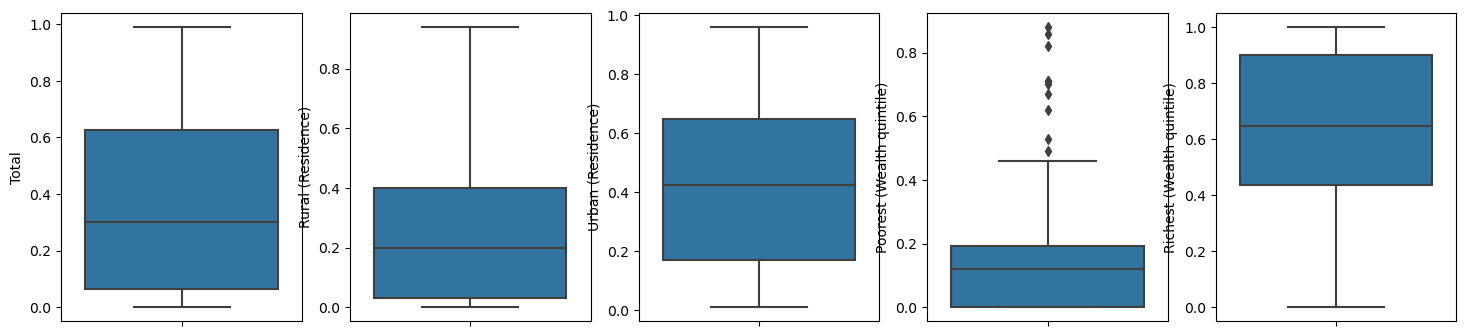

In [21]:
create_plots(primary_data)

Inference : The column - Poorest (Wealth quintile) is having outliers and we choose to remove them

In [22]:
#user defined function to remove outliers by finding inter-quartile range 
#and replacing the outliers with 0
def remove_outliers(column):
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    return column.apply(lambda x: 0 if x > upper_bound or x < lower_bound else x)


In [23]:
#Removing outliers
primary_data['Poorest (Wealth quintile)'] = remove_outliers(primary_data['Poorest (Wealth quintile)'])


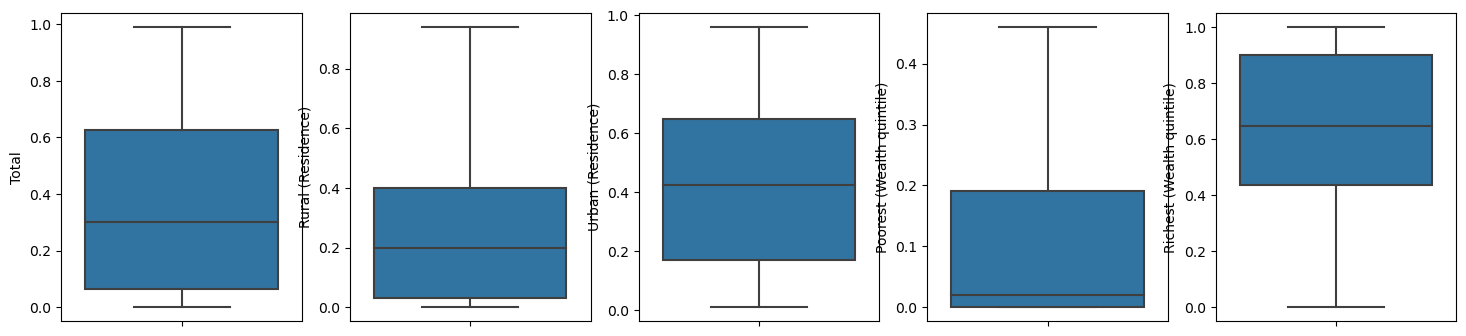

In [24]:
#checking the plot again for finding the outliers
create_plots(primary_data)

Inference : Outliers have been removed and our data set is now clean

#### Understanding the second data set

In [25]:
#Exploring Secondary.csv
#Checking the rows and columns of the data set
secondary_data.shape

(82, 12)

In [26]:
#displaying 10 random rows from the dataset
secondary_data.sample(10, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
34,KEN,Kenya,SSA,ESA,Lower middle income (LM),39%,NaN,29%,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013
26,GNB,Guinea-Bissau,SSA,WCA,Low income (L),3%,2%,4%,0%,4%,Multiple Indicator Cluster Survey,2018-19
37,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),2%,1%,4%,0%,5%,Multiple Indicator Cluster Survey,2017
53,RUS,Russian Federation,ECA,EECA,Upper middle income (UM),90%,77%,96%,90%,100%,"Russia Longitudinal Monitoring Survey, 2018",2018
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),85%,78%,91%,54%,100%,Demographic and Health Survey,2015-16
45,MAR,Morocco,MENA,MENA,Lower middle income (LM),19%,12%,25%,NaN,NaN,Morocco Household and Youth Survey 2010,2010
10,CMR,Cameroon,SSA,WCA,Lower middle income (LM),7%,0%,12%,0%,28%,Multiple Indicator Cluster Survey,2014
18,CUB,Cuba,LAC,LAC,Upper middle income (UM),4%,1%,5%,13%,0%,Multiple Indicator Cluster Survey,2019
74,UGA,Uganda,SSA,ESA,Low income (L),1%,0%,4%,0%,3%,LSMS,2015
19,COD,Democratic Republic of the Congo,SSA,WCA,Low income (L),1%,0%,3%,0%,3%,Multiple Indicator Cluster Survey,2017-18


In [27]:
#understanding the datatypes and attributes of the dataset
secondary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ISO3                       82 non-null     object
 1   Countries and areas        82 non-null     object
 2   Region                     82 non-null     object
 3   Sub-region                 82 non-null     object
 4   Income Group               82 non-null     object
 5   Total                      82 non-null     object
 6   Rural (Residence)          71 non-null     object
 7   Urban (Residence)          74 non-null     object
 8   Poorest (Wealth quintile)  69 non-null     object
 9   Richest (Wealth quintile)  68 non-null     object
 10  Data source                82 non-null     object
 11  Time period                82 non-null     object
dtypes: object(12)
memory usage: 7.8+ KB


Inference:
* The dataset has 12 columns and 82 rows
* All columns are of object type
* 4 columns have missing values

In [28]:
# Converting Total, Rural, Poorest, Richest into numeric for ease of data
#manipulation
secondary_data['Total'] = convert_datatype(secondary_data['Total'])
secondary_data['Rural (Residence)'] = convert_datatype(secondary_data['Rural (Residence)'])
secondary_data['Urban (Residence)'] = convert_datatype(secondary_data['Urban (Residence)'])
secondary_data['Poorest (Wealth quintile)'] = convert_datatype(secondary_data['Poorest (Wealth quintile)'])
secondary_data['Richest (Wealth quintile)'] = convert_datatype(secondary_data['Richest (Wealth quintile)'])

In [29]:
#Checking the unique values in the dataset
secondary_data.nunique()

ISO3                         82
Countries and areas          82
Region                        6
Sub-region                    8
Income Group                  4
Total                        55
Rural (Residence)            44
Urban (Residence)            50
Poorest (Wealth quintile)    29
Richest (Wealth quintile)    42
Data source                  23
Time period                  21
dtype: int64

In [30]:
#checking our data frame after these modifications made
secondary_data.sample(5, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
34,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.39,NaN,0.29,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013
26,GNB,Guinea-Bissau,SSA,WCA,Low income (L),0.03,0.02,0.04,0.00,0.04,Multiple Indicator Cluster Survey,2018-19
37,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),0.02,0.01,0.04,0.00,0.05,Multiple Indicator Cluster Survey,2017
53,RUS,Russian Federation,ECA,EECA,Upper middle income (UM),0.90,0.77,0.96,0.90,1.00,"Russia Longitudinal Monitoring Survey, 2018",2018
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.85,0.78,0.91,0.54,1.00,Demographic and Health Survey,2015-16


In [31]:
secondary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       82 non-null     object 
 1   Countries and areas        82 non-null     object 
 2   Region                     82 non-null     object 
 3   Sub-region                 82 non-null     object 
 4   Income Group               82 non-null     object 
 5   Total                      82 non-null     float64
 6   Rural (Residence)          71 non-null     float64
 7   Urban (Residence)          74 non-null     float64
 8   Poorest (Wealth quintile)  69 non-null     float64
 9   Richest (Wealth quintile)  68 non-null     float64
 10  Data source                82 non-null     object 
 11  Time period                82 non-null     object 
dtypes: float64(5), object(7)
memory usage: 7.8+ KB


#### Checking for missing values

In [32]:
null_values(secondary_data)

Richest (Wealth quintile)    17.07
Poorest (Wealth quintile)    15.85
Rural (Residence)            13.41
Urban (Residence)             9.76
ISO3                          0.00
Countries and areas           0.00
Region                        0.00
Sub-region                    0.00
Income Group                  0.00
Total                         0.00
Data source                   0.00
Time period                   0.00
dtype: float64

In [33]:
#Imputing the missing values by substituting the mean of the columns
grouped_income_region_subregion = secondary_data.groupby(['Region','Sub-region','Income Group']).mean()
grouped_income_region_subregion

Total  Rural (Residence)  \
Region Sub-region Income Group                                            
EAP    EAP        High income (H)           0.880000           0.880000   
                  Lower middle income (LM)  0.378000           0.150000   
                  Upper middle income (UM)  0.813333           0.733333   
ECA    EECA       Low income (L)            0.260000           0.210000   
                  Lower middle income (LM)  0.926667           0.445000   
                  Upper middle income (UM)  0.778000           0.696000   
       WE         High income (H)           0.870000                NaN   
LAC    LAC        High income (H)           0.644000           0.504000   
                  Low income (L)            0.260000           0.150000   
                  Lower middle income (LM)  0.040000                NaN   
                  Upper middle income (UM)  0.442222           0.293750   
MENA   MENA       Lower middle income (LM)  0.320000           0.190000   
                  Upper middle income (UM)  0.490000           0.420000   
SA     SA         Low income (L)            0.490000           0.340000   
                  Lower middle income (LM)  0.213333           0.163333   
                  Upper middle income (UM)  0.730000           0.700000   
SSA    ESA        Low income (L)            0.080000           0.033333   
                  Lower middle income (LM)  0.215714           0.096667   
                  Upper middle income (UM)  0.135000           0.010000   
       WCA        Low income (L)            0.140909           0.077000   
                  Lower middle income (LM)  0.130000           0.093333   

                                            Urban (Residence)  \
Region Sub-region Income Group                                  
EAP    EAP        High income (H)                    0.870000   
                  Lower middle income (LM)           0.458000   
                  Upper middle income (UM)           0.900000   
ECA    EECA       Low income (L)                     0.420000   
                  Lower middle income (LM)           0.676667   
                  Upper middle income (UM)           0.834000   
       WE         High income (H)                         NaN   
LAC    LAC        High income (H)                    0.700000   
                  Low income (L)                     0.410000   
                  Lower middle income (LM)                NaN   
                  Upper middle income (UM)           0.491250   
MENA   MENA       Lower middle income (LM)           0.395000   
                  Upper middle income (UM)           0.520000   
SA     SA         Low income (L)                     0.570000   
                  Lower middle income (LM)           0.333333   
                  Upper middle income (UM)           0.830000   
SSA    ESA        Low income (L)                     0.133333   
                  Lower middle income (LM)           0.301429   
                  Upper middle income (UM)           0.170000   
       WCA        Low income (L)                     0.228000   
                  Lower middle income (LM)           0.191667   

                                            Poorest (Wealth quintile)  \
Region Sub-region Income Group                                          
EAP    EAP        High income (H)                            0.550000   
                  Lower middle income (LM)                   0.065000   
                  Upper middle income (UM)                   0.725000   
ECA    EECA       Low income (L)                             0.080000   
                  Lower middle income (LM)                   0.300000   
                  Upper middle income (UM)                   0.506000   
       WE         High income (H)                                 NaN   
LAC    LAC        High income (H)                            0.294000   
                  Low income (L)                             0.000000   
                  Lowe

In [34]:
#Now finding the mean of Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile) from the
#resultant group by data frame
mean_rural = grouped_income_region_subregion['Rural (Residence)'].mean()
mean_urban = grouped_income_region_subregion['Urban (Residence)'].mean()
mean_Poorest_wealth_quintile = grouped_income_region_subregion['Poorest (Wealth quintile)'].mean()
mean_Richest_wealth_quintile = grouped_income_region_subregion['Richest (Wealth quintile)'].mean()

In [35]:
#Imputing the null values with the mean values obtained from the above calculation

secondary_data['Rural (Residence)'] = secondary_data['Rural (Residence)'].fillna(mean_rural)
secondary_data['Urban (Residence)'] = secondary_data['Urban (Residence)'].fillna(mean_urban)
secondary_data['Poorest (Wealth quintile)'] = secondary_data['Poorest (Wealth quintile)'].fillna(mean_Poorest_wealth_quintile)
secondary_data['Richest (Wealth quintile)'] = secondary_data['Richest (Wealth quintile)'].fillna(mean_Richest_wealth_quintile)

In [36]:
#checking the missing values count again
null_values(secondary_data)

ISO3                         0.0
Countries and areas          0.0
Region                       0.0
Sub-region                   0.0
Income Group                 0.0
Total                        0.0
Rural (Residence)            0.0
Urban (Residence)            0.0
Poorest (Wealth quintile)    0.0
Richest (Wealth quintile)    0.0
Data source                  0.0
Time period                  0.0
dtype: float64

We have cleared the null values.<br>
Now cleaning the time period column as explained above

In [37]:
#converting the time period column into single values
secondary_data['Time period'] = secondary_data['Time period'].apply(time_period_correction)

#### Checking for outliers

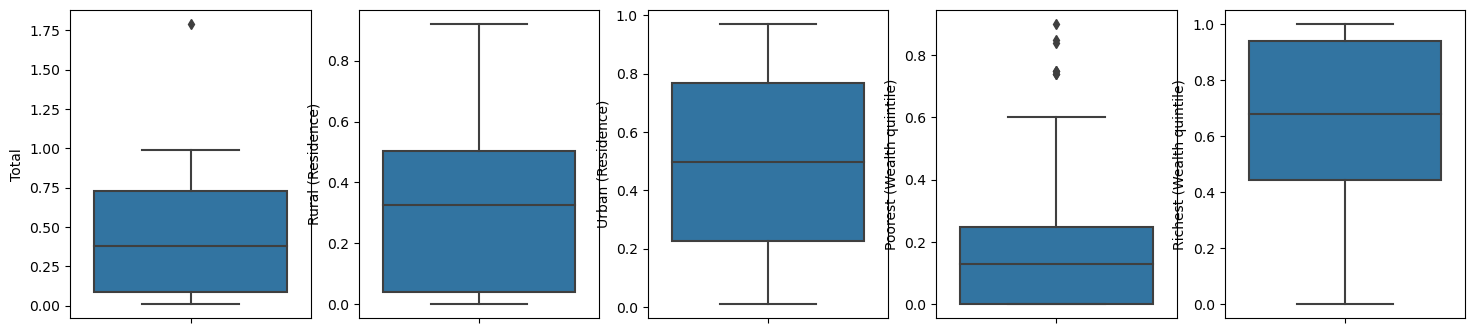

In [38]:
create_plots(secondary_data)

Inference : We have few outliers in 'Total' column and Poorest (Wealth quintile) columns which we choose to remove as explained above

In [39]:
#Removing outliers
secondary_data['Poorest (Wealth quintile)'] = remove_outliers(secondary_data['Poorest (Wealth quintile)'])

In [40]:
secondary_data['Total'] = remove_outliers(secondary_data['Total'])

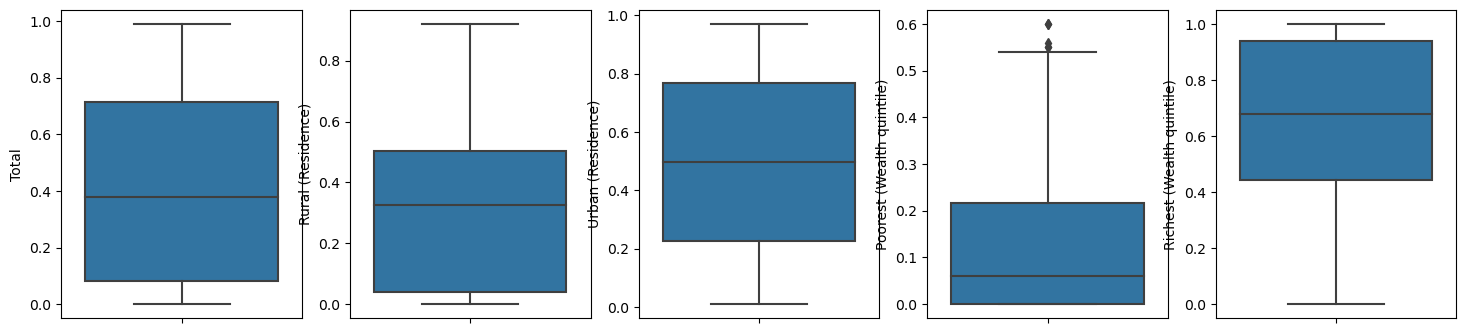

In [41]:
#checking the plot again for finding the outliers
create_plots(secondary_data)

Inference : Most of the outliers are handled in this stage

#### Understanding the third data set

In [42]:
#Exploring Total School Age.csv
#Checking the rows and columns of the data set
total_data.shape

(87, 12)

In [43]:
#Displaying 10 random rows from the data set
total_data.sample(10, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
10,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),76%,66%,81%,35%,97%,Bulgarian Longitudinal Inclusive Society Surve...,2013
40,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),2%,1%,4%,0%,5%,Multiple Indicator Cluster Survey,2017
41,LSO,Lesotho,SSA,ESA,Lower middle income (LM),32%,22%,52%,6%,70%,Multiple Indicator Cluster Survey,2018
65,ZAF,South Africa,SSA,ESA,Upper middle income (UM),20%,NaN,NaN,NaN,NaN,South Africa Living Conditions Survey 2014-15,2014-15
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),32%,NaN,24%,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013
54,NGA,Nigeria,SSA,WCA,Lower middle income (LM),3%,NaN,NaN,NaN,NaN,"General Household Survey, Panel 2018-2019, Wave 4",2018-2019
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),40%,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
60,STP,Sao Tome and Principe,SSA,WCA,Lower middle income (LM),44%,37%,48%,20%,75%,Multiple Indicator Cluster Survey,2019
15,CHL,Chile,LAC,LAC,High income (H),86%,70%,89%,73%,99%,CASEN,2017
74,TON,Tonga,EAP,EAP,Upper middle income (UM),91%,90%,94%,83%,95%,Multiple Indicator Cluster Survey,2019


In [44]:
#getting to know the datatypes of the attributes in the dataset
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ISO3                       87 non-null     object
 1   Countries and areas        87 non-null     object
 2   Region                     87 non-null     object
 3   Sub-region                 87 non-null     object
 4   Income Group               87 non-null     object
 5   Total                      87 non-null     object
 6   Rural (Residence)          77 non-null     object
 7   Urban (Residence)          80 non-null     object
 8   Poorest (Wealth quintile)  70 non-null     object
 9   Richest (Wealth quintile)  69 non-null     object
 10  Data source                87 non-null     object
 11  Time period                87 non-null     object
dtypes: object(12)
memory usage: 8.3+ KB


Inference :<br>
   * The data set has 12 columns and 87 rows
   * All columns are of object type
   * 4 columns have missing values

In [45]:
# Converting Total, Rural, Poorest, Richest into numeric for ease of data
#manipulation
total_data['Total'] = convert_datatype(total_data['Total'])
total_data['Rural (Residence)'] = convert_datatype(total_data['Rural (Residence)'])
total_data['Urban (Residence)'] = convert_datatype(total_data['Urban (Residence)'])
total_data['Poorest (Wealth quintile)'] = convert_datatype(total_data['Poorest (Wealth quintile)'])
total_data['Richest (Wealth quintile)'] = convert_datatype(total_data['Richest (Wealth quintile)'])

In [46]:
#Checking the unique values in the dataset
total_data.nunique()

ISO3                         87
Countries and areas          87
Region                        6
Sub-region                    8
Income Group                  5
Total                        58
Rural (Residence)            39
Urban (Residence)            55
Poorest (Wealth quintile)    33
Richest (Wealth quintile)    44
Data source                  26
Time period                  20
dtype: int64

In [47]:
#Printing the unique values in each column of Total School Age dataset
for column in total_data:
    print(total_data[column].unique())

['DZA' 'AGO' 'ARG' 'ARM' 'BGD' 'BRB' 'BEN' 'BOL' 'BIH' 'BRA' 'BGR' 'BFA'
 'CMR' 'CAF' '   TCD' 'CHL' 'CHN' 'COL' 'CRI' 'CIV' 'CUB' 'COD' 'DJI'
 'DOM' 'ECU' 'EGY' 'GMB' 'GEO' 'GHA' 'GTM' 'GNB' 'HTI' 'IND' 'IDN' 'IRQ'
 'JPN' 'JOR' 'KEN' 'KIR' 'KGZ' 'LAO' 'LSO' 'MDG' 'MDV' 'MLI' 'MRT' 'MEX'
 'MNG' 'MNE' 'MAR' 'NAM' 'NPL' 'NIC' 'NER' 'NGA' 'PAK' 'PAN' 'PER' 'RUS'
 'LCA' 'STP' 'SEN' 'SRB' 'SLE' 'SOM' 'ZAF' 'SSD' 'LKA' 'SDN' 'SUR' 'TJK'
 'THA' 'MKD' 'TGO' 'TON' 'TTO' 'TUN' 'TUR' 'TKM' 'UGA' 'UKR' 'GBR' 'URY'
 'UZB' 'VNM' 'ZMB' 'ZWE']
['Algeria' 'Angola' 'Argentina' 'Armenia' 'Bangladesh' 'Barbados' 'Benin'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Cameroon' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Costa Rica' "C™te d'Ivoire" 'Cuba'
 'Democratic Republic of the Congo' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Gambia' 'Georgia' 'Ghana' 'Guatemala' 'Guinea-Bissau'
 'Haiti' 'India' 'Indonesia' 'Iraq' 'Japan' 

Inference : Income Group column has spelling mismatch for the value Lower middle income (LM). <br>
We need to correct it and set it to the same spelling for cleaning

In [48]:
#correcting the mis-spelled value
total_data.loc[total_data['Income Group']=='Lowerr middle income (LM)','Income Group']='Lower middle income (LM)'

In [49]:
#checking for the unique values after correcting
print(total_data['Income Group'].unique())

['Upper middle income (UM)' 'Lower middle income (LM)' 'High income (H)'
 'Low income (L)']


Inference : Spelling errors are now corrected

In [50]:
#checking our data frame after these modifications made
total_data.sample(5, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
10,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),0.76,0.66,0.81,0.35,0.97,Bulgarian Longitudinal Inclusive Society Surve...,2013
40,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),0.02,0.01,0.04,0.00,0.05,Multiple Indicator Cluster Survey,2017
41,LSO,Lesotho,SSA,ESA,Lower middle income (LM),0.32,0.22,0.52,0.06,0.70,Multiple Indicator Cluster Survey,2018
65,ZAF,South Africa,SSA,ESA,Upper middle income (UM),0.20,NaN,NaN,NaN,NaN,South Africa Living Conditions Survey 2014-15,2014-15
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.32,NaN,0.24,NaN,NaN,STEP Skills Measurement Household Survey 2013 ...,2013


In [51]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       87 non-null     object 
 1   Countries and areas        87 non-null     object 
 2   Region                     87 non-null     object 
 3   Sub-region                 87 non-null     object 
 4   Income Group               87 non-null     object 
 5   Total                      87 non-null     float64
 6   Rural (Residence)          77 non-null     float64
 7   Urban (Residence)          80 non-null     float64
 8   Poorest (Wealth quintile)  70 non-null     float64
 9   Richest (Wealth quintile)  69 non-null     float64
 10  Data source                87 non-null     object 
 11  Time period                87 non-null     object 
dtypes: float64(5), object(7)
memory usage: 8.3+ KB


#### Checking missing values

In [52]:
null_values(total_data)

Richest (Wealth quintile)    20.69
Poorest (Wealth quintile)    19.54
Rural (Residence)            11.49
Urban (Residence)             8.05
ISO3                          0.00
Countries and areas           0.00
Region                        0.00
Sub-region                    0.00
Income Group                  0.00
Total                         0.00
Data source                   0.00
Time period                   0.00
dtype: float64

In [53]:
#Imputing the missing values by substituting the mean of the columns
grouped_income_region_subregion = total_data.groupby(['Region','Sub-region','Income Group']).mean()
grouped_income_region_subregion

Total  Rural (Residence)  \
Region Sub-region Income Group                                            
EAP    EAP        High income (H)           0.780000           0.830000   
                  Lower middle income (LM)  0.342000           0.142500   
                  Upper middle income (UM)  0.730000           0.690000   
ECA    EECA       Low income (L)            0.240000           0.200000   
                  Lower middle income (LM)  0.546667           0.425000   
                  Upper middle income (UM)  0.740000           0.645000   
       WE         High income (H)           0.990000                NaN   
LAC    LAC        High income (H)           0.580000           0.444000   
                  Low income (L)            0.210000           0.110000   
                  Lower middle income (LM)  0.080000           0.040000   
                  Upper middle income (UM)  0.395833           0.225455   
MENA   MENA       Lower middle income (LM)  0.246667           0.143333   
                  Upper middle income (UM)  0.370000           0.263333   
SA     SA         Low income (L)            0.470000           0.320000   
                  Lower middle income (LM)  0.183333           0.140000   
                  Upper middle income (UM)  0.700000           0.680000   
SSA    ESA        Low income (L)            0.060000           0.020000   
                  Lower middle income (LM)  0.174286           0.076667   
                  Upper middle income (UM)  0.135000           0.010000   
       WCA        Low income (L)            0.111818           0.067000   
                  Lower middle income (LM)  0.114286           0.085000   

                                            Urban (Residence)  \
Region Sub-region Income Group                                  
EAP    EAP        High income (H)                    0.770000   
                  Lower middle income (LM)           0.420000   
                  Upper middle income (UM)           0.876667   
ECA    EECA       Low income (L)                     0.380000   
                  Lower middle income (LM)           0.610000   
                  Upper middle income (UM)           0.809000   
       WE         High income (H)                         NaN   
LAC    LAC        High income (H)                    0.638000   
                  Low income (L)                     0.360000   
                  Lower middle income (LM)           0.170000   
                  Upper middle income (UM)           0.461818   
MENA   MENA       Lower middle income (LM)           0.330000   
                  Upper middle income (UM)           0.420000   
SA     SA         Low income (L)                     0.550000   
                  Lower middle income (LM)           0.293333   
                  Upper middle income (UM)           0.790000   
SSA    ESA        Low income (L)                     0.100000   
                  Lower middle income (LM)           0.260000   
                  Upper middle income (UM)           0.150000   
       WCA        Low income (L)                     0.197000   
                  Lower middle income (LM)           0.175000   

                                            Poorest (Wealth quintile)  \
Region Sub-region Income Group                                          
EAP    EAP        High income (H)                            0.620000   
                  Lower middle income (LM)                   0.055000   
                  Upper middle income (UM)                   0.650000   
ECA    EECA       Low income (L)                             0.060000   
                  Lower middle income (LM)                   0.275000   
                  Upper middle income (UM)                   0.454000   
       WE         High income (H)                                 NaN   
LAC    LAC        High income (H)                            0.250000   
                  Low income (L)                             0.000000   
                  Lowe

In [54]:
#Now finding the mean of Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile) from the
#resultant group by data frame
mean_rural = grouped_income_region_subregion['Rural (Residence)'].mean()
mean_urban = grouped_income_region_subregion['Urban (Residence)'].mean()
mean_Poorest_wealth_quintile = grouped_income_region_subregion['Poorest (Wealth quintile)'].mean()
mean_Richest_wealth_quintile = grouped_income_region_subregion['Richest (Wealth quintile)'].mean()

In [55]:
#Imputing the null values with the mean values obtained from the above calculation

total_data['Rural (Residence)'] = total_data['Rural (Residence)'].fillna(mean_rural)
total_data['Urban (Residence)'] = total_data['Urban (Residence)'].fillna(mean_urban)
total_data['Poorest (Wealth quintile)'] = total_data['Poorest (Wealth quintile)'].fillna(mean_Poorest_wealth_quintile)
total_data['Richest (Wealth quintile)'] = total_data['Richest (Wealth quintile)'].fillna(mean_Richest_wealth_quintile)

In [56]:
#checking the missing values count again
null_values(total_data)

ISO3                         0.0
Countries and areas          0.0
Region                       0.0
Sub-region                   0.0
Income Group                 0.0
Total                        0.0
Rural (Residence)            0.0
Urban (Residence)            0.0
Poorest (Wealth quintile)    0.0
Richest (Wealth quintile)    0.0
Data source                  0.0
Time period                  0.0
dtype: float64

We have cleared the null values.<br>
Now cleaning the time period column as explained above

In [57]:
#converting the time period column into single values
total_data['Time period'] = total_data['Time period'].apply(time_period_correction)

#### Finding outliers

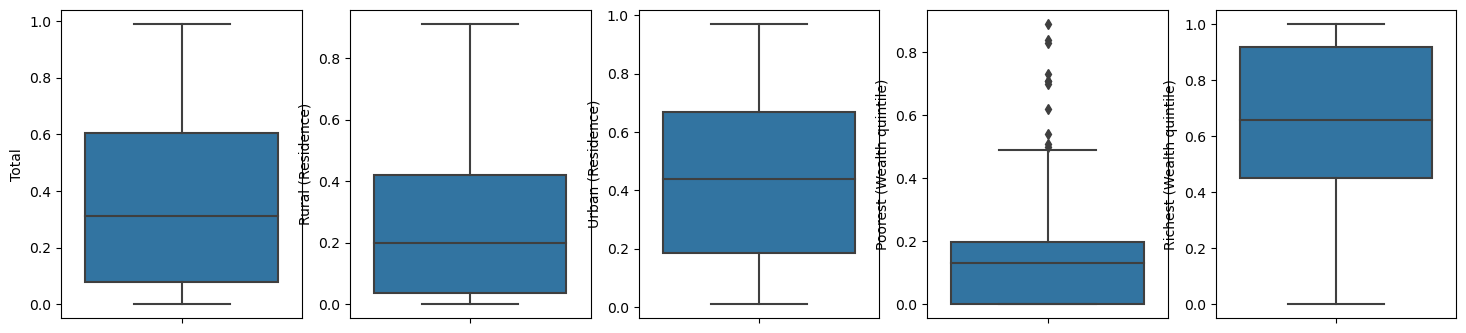

In [58]:
create_plots(total_data)

Inference : Poorest (Wealth quintile) has outliers, which we choose to remove

In [59]:
#Removing outliers
total_data['Poorest (Wealth quintile)'] = remove_outliers(total_data['Poorest (Wealth quintile)'])

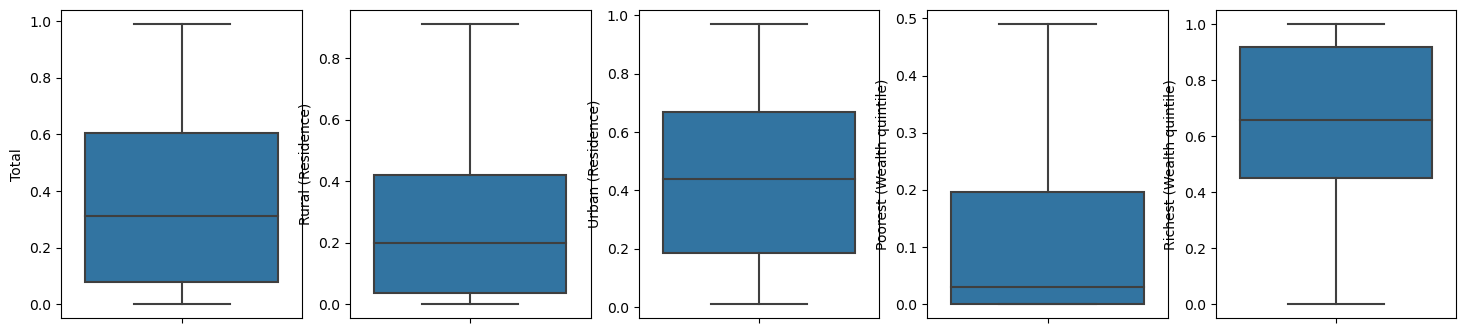

In [60]:
#checking the plot again for finding the outliers
create_plots(total_data)

Inference : outliers are all handled in this dataset

In [61]:
#displaying some random rows in all 3 clean data sets
primary_data.sample(5, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
10,BFA,Burkina Faso,SSA,WCA,Low income (L),0.01,0.010000,0.030000,0.010000,0.040000,Demographic and Health Survey,2010
40,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),0.01,0.010000,0.040000,0.000000,0.050000,Multiple Indicator Cluster Survey,2017
41,LSO,Lesotho,SSA,ESA,Lower middle income (LM),0.30,0.210000,0.500000,0.050000,0.680000,Multiple Indicator Cluster Survey,2018
65,ZAF,South Africa,SSA,ESA,Upper middle income (UM),0.18,0.273736,0.424711,0.191184,0.646932,South Africa Living Conditions Survey 2014-15,2015
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.30,0.273736,0.220000,0.191184,0.646932,STEP Skills Measurement Household Survey 2013 ...,2013


In [62]:
secondary_data.sample(5, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
34,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.39,0.325566,0.29,0.216263,0.679892,STEP Skills Measurement Household Survey 2013 ...,2013
26,GNB,Guinea-Bissau,SSA,WCA,Low income (L),0.03,0.020000,0.04,0.000000,0.040000,Multiple Indicator Cluster Survey,2019
37,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),0.02,0.010000,0.04,0.000000,0.050000,Multiple Indicator Cluster Survey,2017
53,RUS,Russian Federation,ECA,EECA,Upper middle income (UM),0.90,0.770000,0.96,0.000000,1.000000,"Russia Longitudinal Monitoring Survey, 2018",2018
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.85,0.780000,0.91,0.540000,1.000000,Demographic and Health Survey,2016


In [63]:
total_data.sample(5, random_state = 999)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Rural (Residence),Urban (Residence),Poorest (Wealth quintile),Richest (Wealth quintile),Data source,Time period
10,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),0.76,0.660000,0.810000,0.350000,0.970000,Bulgarian Longitudinal Inclusive Society Surve...,2013
40,LAO,Lao People's Democratic Republic,EAP,EAP,Lower middle income (LM),0.02,0.010000,0.040000,0.000000,0.050000,Multiple Indicator Cluster Survey,2017
41,LSO,Lesotho,SSA,ESA,Lower middle income (LM),0.32,0.220000,0.520000,0.060000,0.700000,Multiple Indicator Cluster Survey,2018
65,ZAF,South Africa,SSA,ESA,Upper middle income (UM),0.20,0.277864,0.438041,0.196053,0.657613,South Africa Living Conditions Survey 2014-15,2015
37,KEN,Kenya,SSA,ESA,Lower middle income (LM),0.32,0.277864,0.240000,0.196053,0.657613,STEP Skills Measurement Household Survey 2013 ...,2013


All our data sets are now clean and can be written back into csv files

In [64]:
#Writing dataframe object into a csv file

primary_data.to_csv('cleaned_Primary.csv', index=False)
secondary_data.to_csv('cleaned_Secondary.csv', index=False)
total_data.to_csv('cleaned_Total.csv', index=False)


# Task 2: Data Exploration

## Task 2.1 

In [65]:
# Code goes after this line by adding cells


Here we have chosen the following columns:<br>
* Nominal - Countries and areas
* Ordinal - Income Group
* Numerical - Total

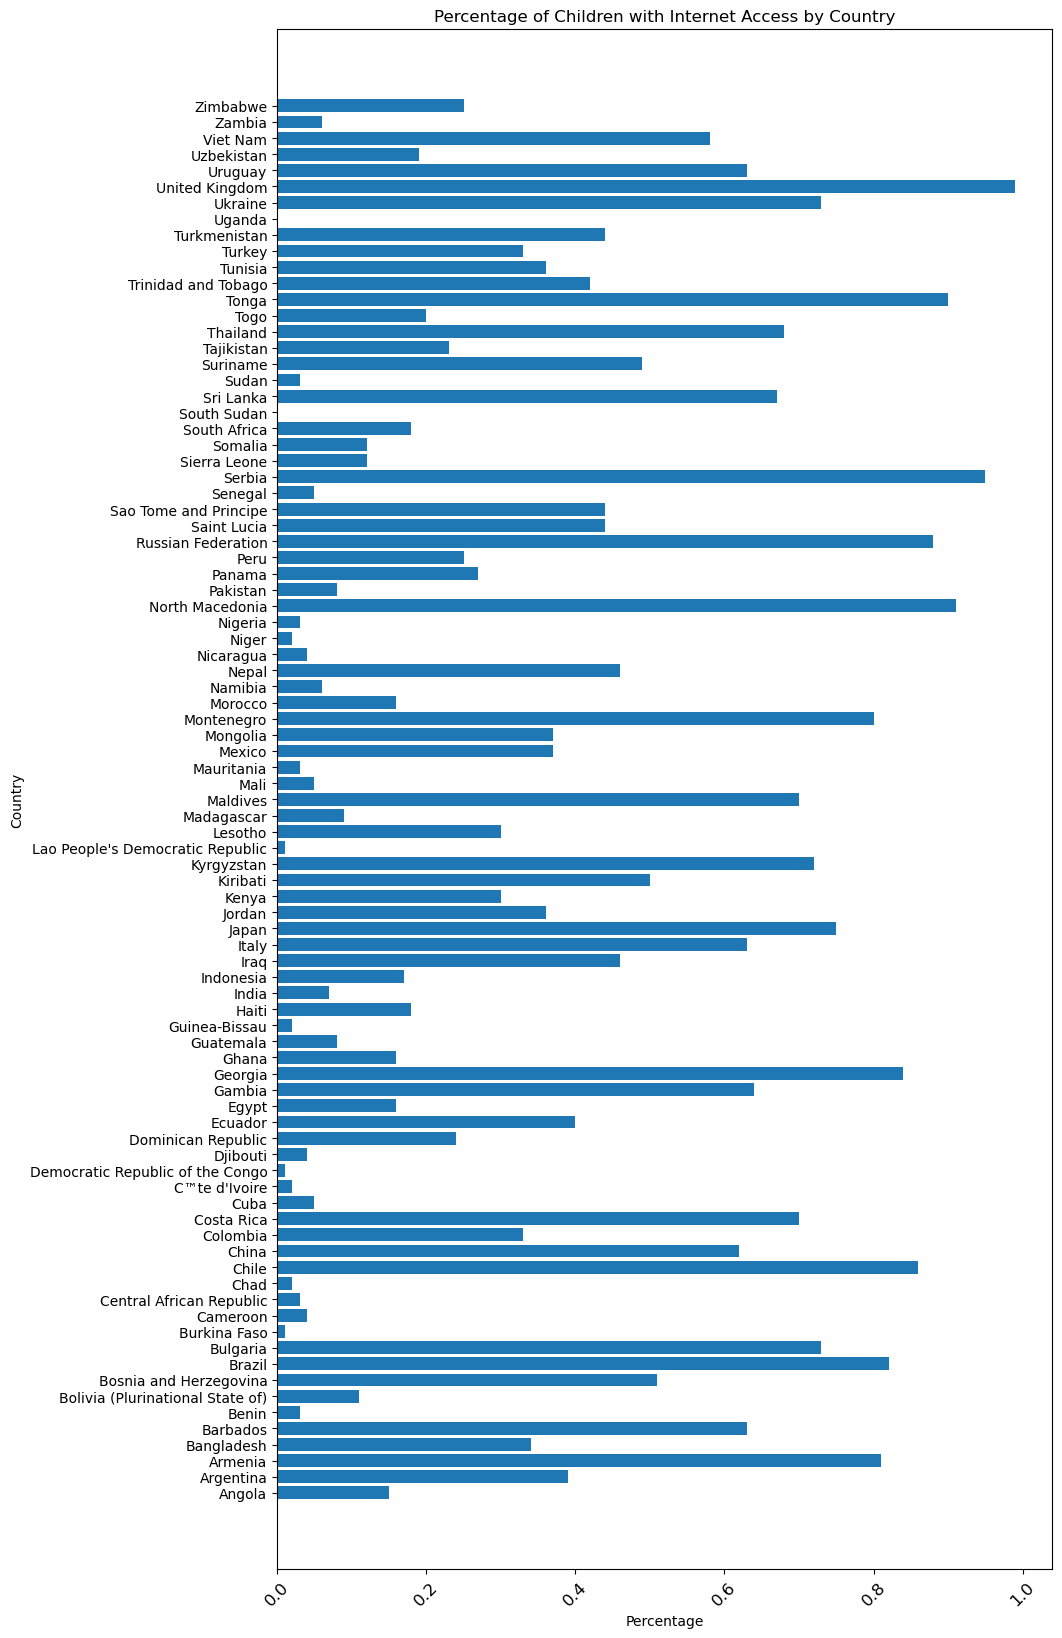

In [66]:
#VISUALISATION FOR NOMINAL ATTRIBUTE - COUNTRIES AND AREAS
# create a bar chart of countries and areas
country_totals = primary_data.groupby('Countries and areas')['Total'].mean()
# Create bar chart with larger figure size and smaller font size
plt.figure(figsize=(10,20))
plt.barh(country_totals.index, country_totals.values)
plt.title('Percentage of Children with Internet Access by Country')
plt.ylabel('Country')
plt.xlabel('Percentage')
plt.xticks(rotation=45, fontsize=12)
plt.show()

Inference : This  bar chart shows the mean percentage of primary school children with Internet access across countries<br>
X -axis shows the mean percentage of children with Internet connectivity at home and Y-axis shows the countries/areas.

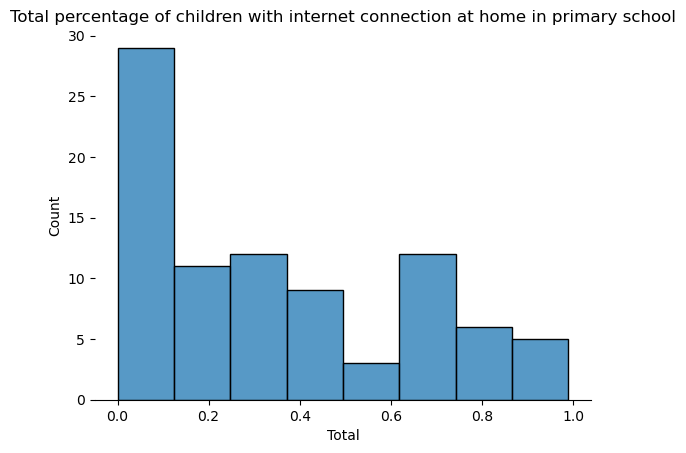

In [67]:
#VISUALISATION FOR NUMERICAL ATTRIBUTE - TOTAL
sns.histplot(data=primary_data, x='Total')
sns.despine(left=True)
plt.title('Total percentage of children with internet connection at home in primary school')
plt.xlabel('Total')
plt.show()

Inference: This histogram shows the distribution of total % of children with internet connectivity at home. <br>
X-axis shows the total percentage and Y-axis depicts the frequency of their occurances.


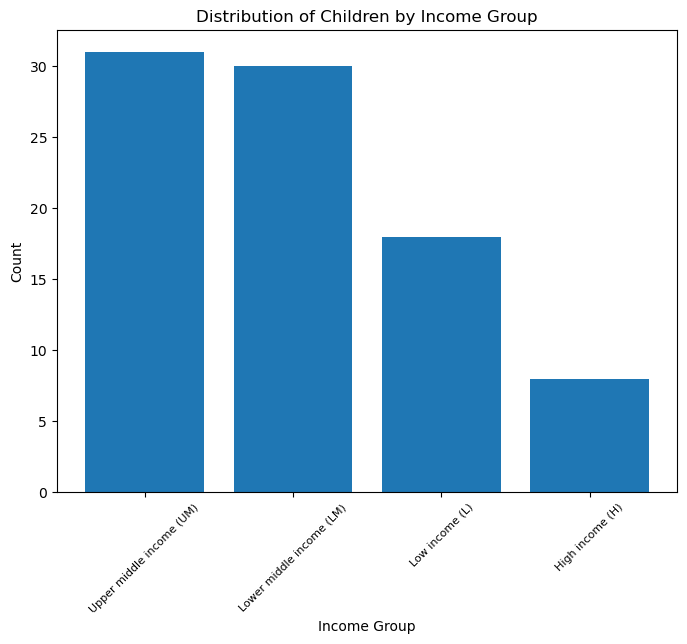

In [68]:
#VISUALISATION FOR ORDINAL ATTRIBUTE - INCOME GROUP
income_counts = primary_data['Income Group'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(income_counts.index, income_counts.values)
ax.set_title('Distribution of Children by Income Group')
ax.set_xlabel('Income Group')
ax.set_ylabel('Count')
plt.xticks(rotation=45, fontsize=8)
plt.show()

Infernce : The bar chart depicts the distribution of primary school children in each income groups<br>
X-axis represents the income groups, and the Y-axis represents the frequency of these income groups among the children.

## Task 2.2 

In [69]:
# Code goes after this line by adding cells

We choose the Total School Age data set for this analysis as it has information about all children in school attendance age

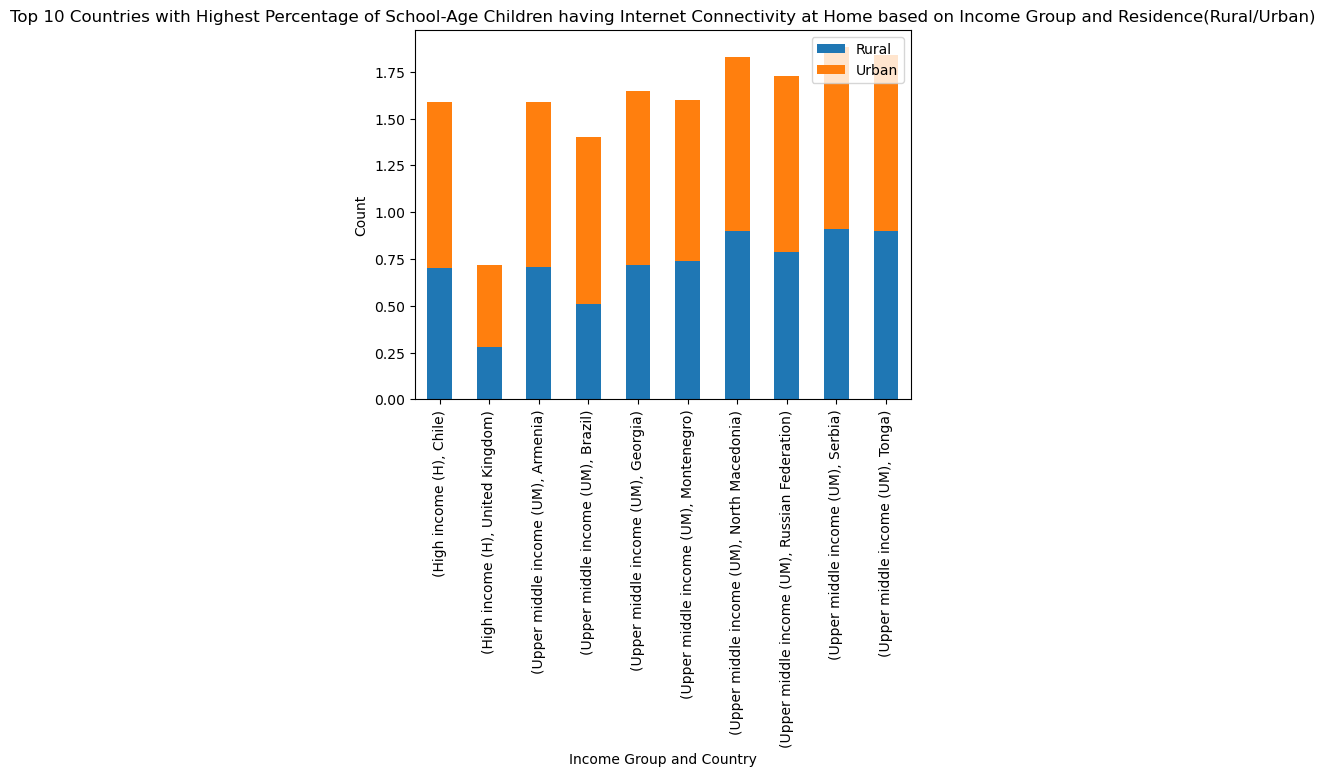

In [70]:
# Filtering data to include only the top 10 countries and areas with the highest total percentage of school-age children who has internet connectivity at home
top_countries = total_data.sort_values(by='Total', ascending=False).head(10)
top_countries.set_index('Countries and areas', inplace=True) # set country names as index

# Now we create a new dataframe with columns for Income Group, Rural(Residence), and Urban(Residence).
new_country_data = pd.DataFrame(columns=['Country', 'Income Group', 'Rural', 'Urban'])

# For each country present in the top countries, we extract its corresponding
#Income group and Rural(Residence) and Urban(Residence) values and store it in the new dataframe
for country in top_countries.index:
    row = total_data[total_data['Countries and areas']==country].iloc[0]
    new_country_data = new_country_data.append({'Country': country,
                                        'Income Group': row['Income Group'],
                                        'Rural': row['Rural (Residence)'],
                                        'Urban': row['Urban (Residence)']}, ignore_index=True)

# creating a pivot table to group by Income Group and Country and aggregate the Rural and Urban columns
grouped_income_data = new_country_data.pivot_table(index=['Income Group', 'Country'], values=['Rural', 'Urban'], aggfunc='sum')

# Visualising the distribution of Income Group and Residence (Rural or Urban) for top 10 countries using Bar chart
grouped_income_data.plot(kind='bar', stacked=True)
plt.title('Top 10 Countries with Highest Percentage of School-Age Children having Internet Connectivity at Home based on Income Group and Residence(Rural/Urban)')
plt.xlabel('Income Group and Country')
plt.ylabel('Count')

# modify the legend to show urban and rural
plt.legend(['Rural', 'Urban'], loc='upper right')

plt.show()

Inference : <br>
This stacked bar chart depicts the distribution of Income Group and Residence (Rural or Urban) for the top 10 countries and areas with the highest percentage of school-age children having internet connectivity. <br>

## Task 2.3 

In [71]:
# Code goes after this line by adding cells
# Calculate the total percentage of primary school children with internet connection at home
primary_children_with_internet = primary_data.loc[(primary_data['Income Group'] == 'Lower middle income (LM)')]['Total'].sum()
primary_total_children = len(primary_data.loc[(primary_data['Income Group'] == 'Lower middle income (LM)')])
primary_percentage = (primary_children_with_internet / primary_total_children)

In [72]:
# Calculate the total percentage of secondary school children with internet connection at home
secondary_children_with_internet = secondary_data.loc[(secondary_data['Income Group'] == 'Lower middle income (LM)')]['Total'].sum()
secondary_total_children = len(secondary_data.loc[(secondary_data['Income Group'] == 'Lower middle income (LM)')])
secondary_percentage = (secondary_children_with_internet / secondary_total_children)

In [73]:
# Print the results
print("Percentage of lower-middle-income children in primary school with internet connection at home: {:.2f}%".format(primary_percentage*100))
print("Percentage of lower-middle-income children in secondary school with internet connection at home: {:.2f}%".format(secondary_percentage*100))

Percentage of lower-middle-income children in primary school with internet connection at home: 21.63%
Percentage of lower-middle-income children in secondary school with internet connection at home: 23.64%


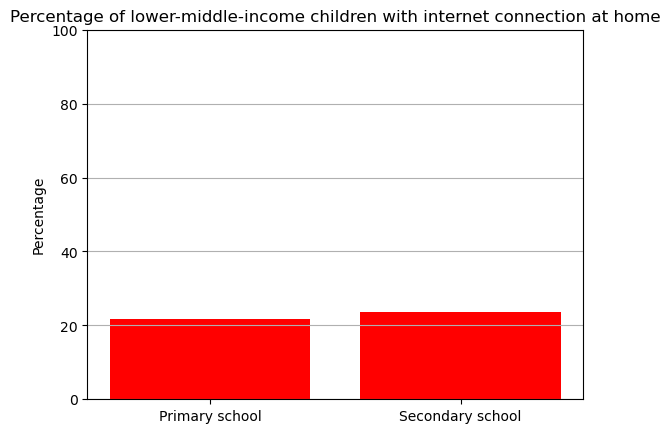

In [74]:
# VISUALISING THE COMPARSION BY CREATING A BAR PLOT
fig, ax = plt.subplots()
x_labels = ['Primary school', 'Secondary school']
percentages = [primary_percentage*100, secondary_percentage*100]
ax.bar(x_labels, percentages, color='red')
ax.set_title('Percentage of lower-middle-income children with internet connection at home')
ax.set_ylabel('Percentage')
ax.set_ylim([0, 100])
ax.yaxis.grid(True)
plt.show()

Inference :<br> 
The bar chart shows the comparison between the percentage of lower-middle-income children with home Internet connection from primary and secondary schools. 
X-axis shows the school levels, and  Y-axis shows the percentage of lower-middle-income children with Internet connectivity at home.